# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())

720


In [4]:
#  2. Modify our df to have all duplicate rows removed.
df = df.drop_duplicates()
print(df.shape)

(11194, 15)


In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print(df.duplicated().sum())

0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [7]:
# * Print how long our dataframe is.
print(df.shape)

(11194, 15)


In [8]:
# * Remove any row that has a null value in it. 
df = df.dropna()

In [9]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print(df.shape)
df.isnull().sum()

(11092, 15)


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<Axes: ylabel='Make'>

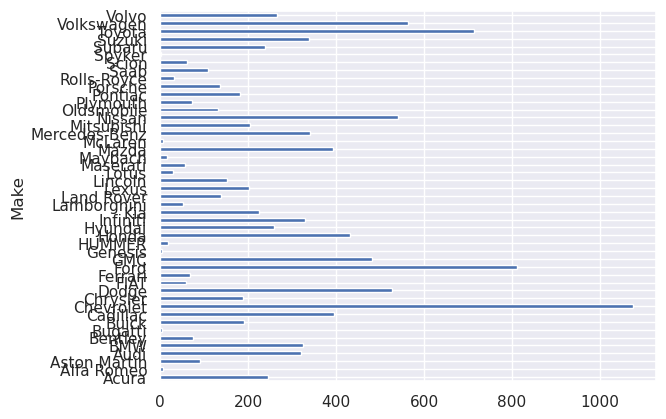

In [10]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
# df['Make'].value_counts().plot.bar()
gb = df.groupby('Make').size()
gb.plot(kind='barh')

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<Axes: title={'center': 'Number of Cars by Make'}, ylabel='Make'>

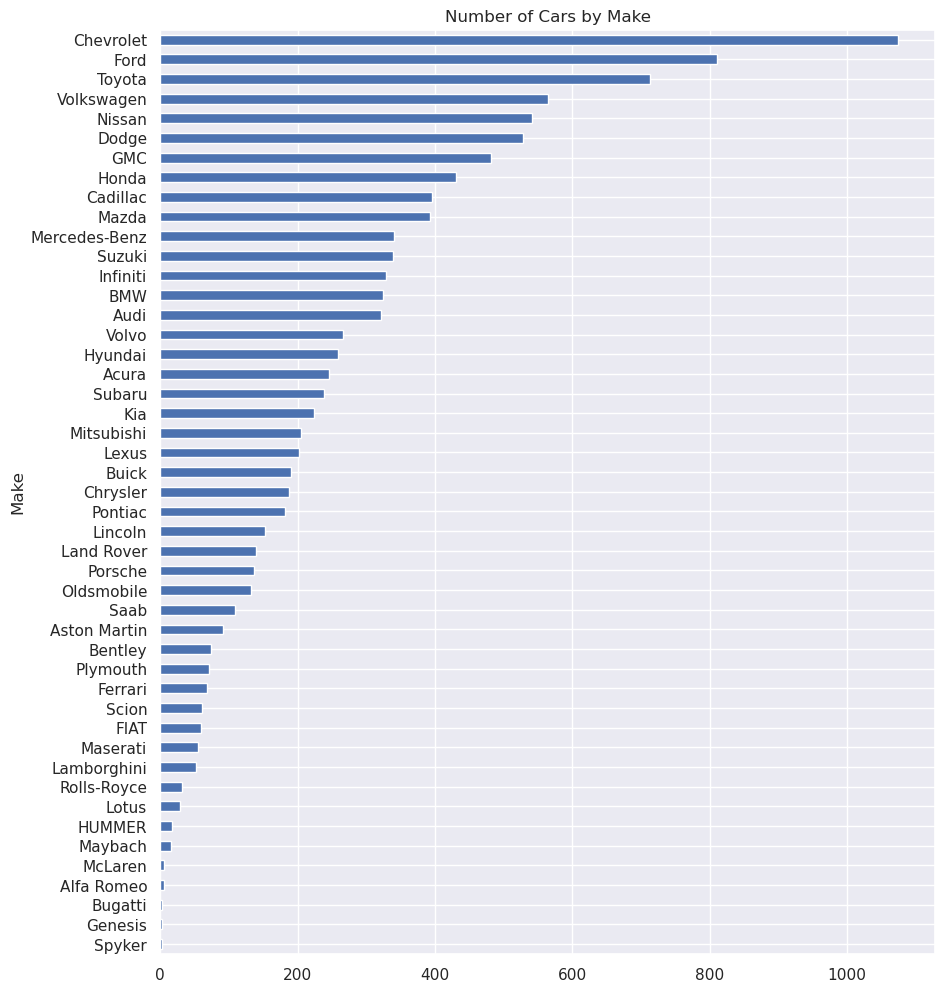

In [11]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
plt.figure(figsize=(10, 12))
gb = gb.sort_values(ascending=True)
plt.title('Number of Cars by Make')
plt.xlabel('Count')
plt.ylabel('Make')
gb.plot(kind='barh')

# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


<Axes: xlabel='Year'>

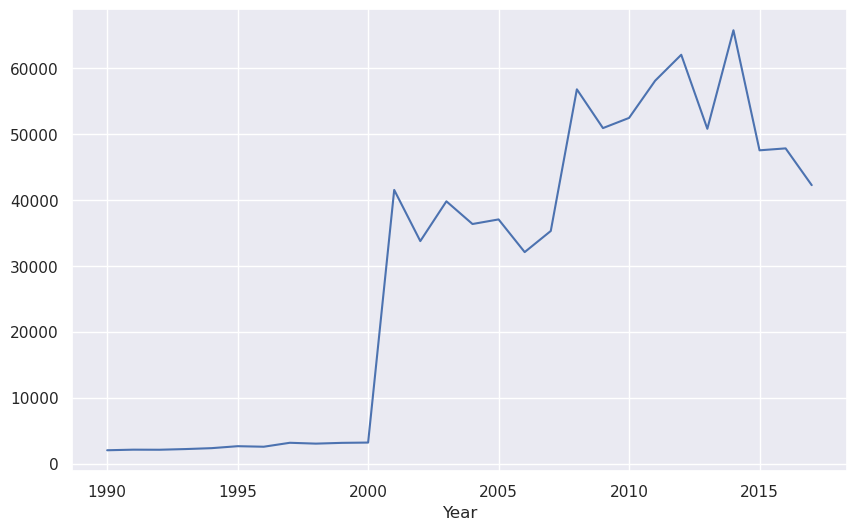

In [12]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
gb = df.groupby('Year')['MSRP'].mean()
plt.figure(figsize=(10,6))
gb.plot.line(x='Year', y='MSRP')

# Year should be on the y-axis instead. Also, the MSRP should have more units since some years have very 
# similiar bars

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [13]:
# Make a column where is 10 when year is less than 2000, else 1.
df['adjusted_price'] = np.where(df['Year'] < 2000, 10, 1)
# Multiply the MSRP by the price adjuster.
df['adjusted_price'] = df['MSRP'] * df['adjusted_price']
df[df['Year'] < 2000][['Year', 'MSRP', 'adjusted_price']].head(5)

,Year,MSRP,adjusted_price
17,1992,2000,20000
19,1992,2000,20000
21,1992,2000,20000
22,1993,2000,20000
23,1993,2000,20000


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<Axes: xlabel='Year'>

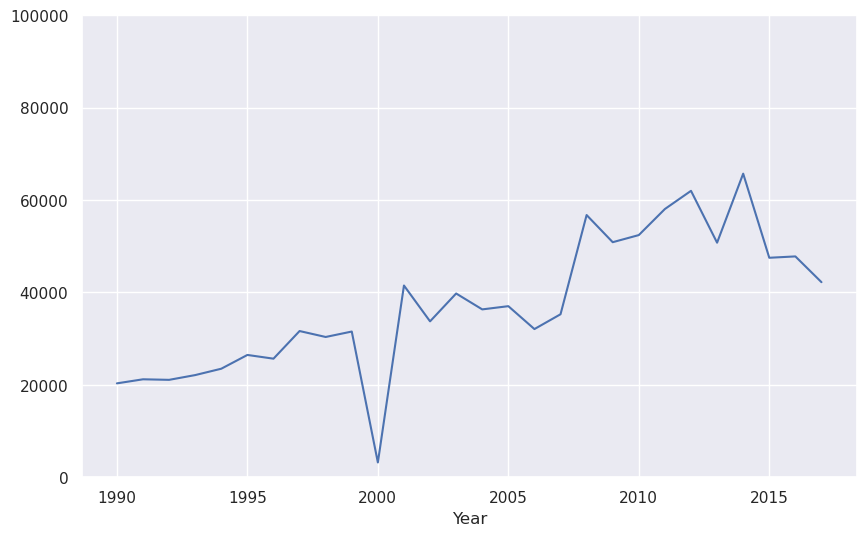

In [14]:
# Plot new prices
gb = df.groupby('Year')['adjusted_price'].mean()
plt.figure(figsize=(10,6))
gb.plot.line(x='Year', y='MSRP', ylim=(0,100000))

# Plot the relationship between Engine HP and highway MPG

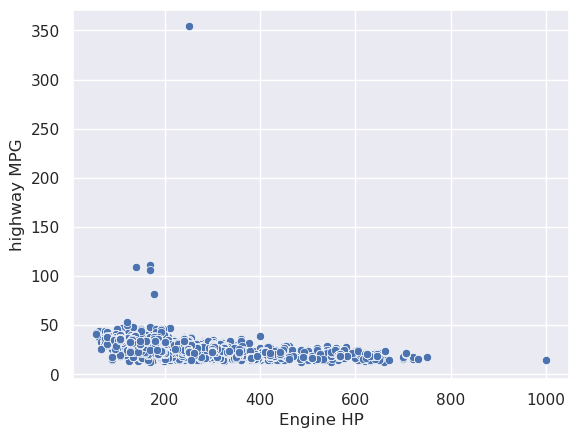

In [15]:
# Plot the relationship between Engine HP and highway MPG
ax = sns.scatterplot(data=df, 
                x='Engine HP', 
                y='highway MPG');

In [16]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 
highway_MPG_outlier = df['highway MPG'] < 80
engine_HP_outlier = df['Engine HP'] < 800
df = df[highway_MPG_outlier & engine_HP_outlier]

# Replot the relationship between Engine HP and highway MPG


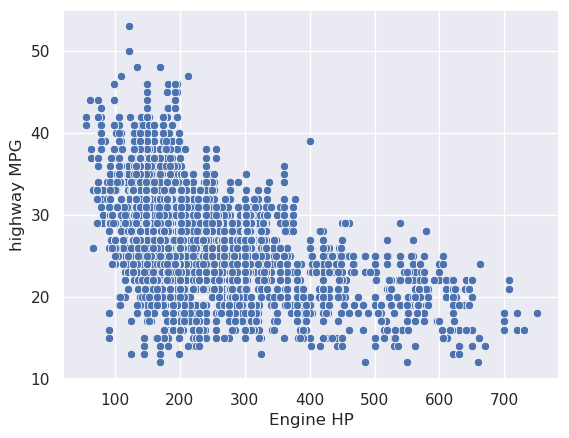

In [17]:
# Re-Plot the relationship between Engine HP and highway MPG
ax = sns.scatterplot(data=df, 
                x='Engine HP', 
                y='highway MPG');

# Make a scatter plot of Engine HP vs highway MPG

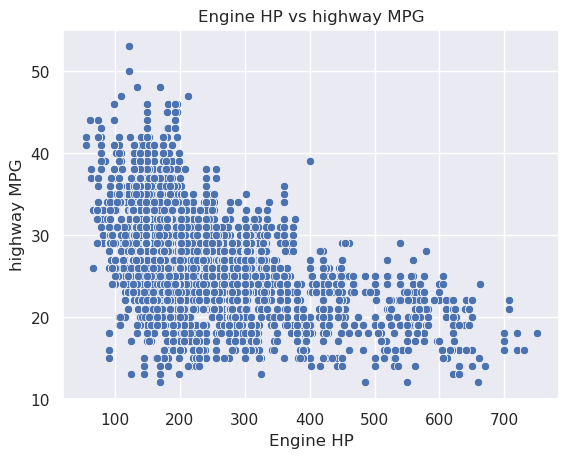

In [18]:
# Make a scatter plot of Engine HP vs highway MPG
ax = sns.scatterplot(data=df, 
                x='Engine HP', 
                y='highway MPG');
ax.set_title("Engine HP vs highway MPG");

In [19]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('Cars with high highway MPG tend to have low Engine HP. However, those with High Engine HP have low highway MPG')

Cars with high highway MPG tend to have low Engine HP. However, those with High Engine HP have low highway MPG


/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


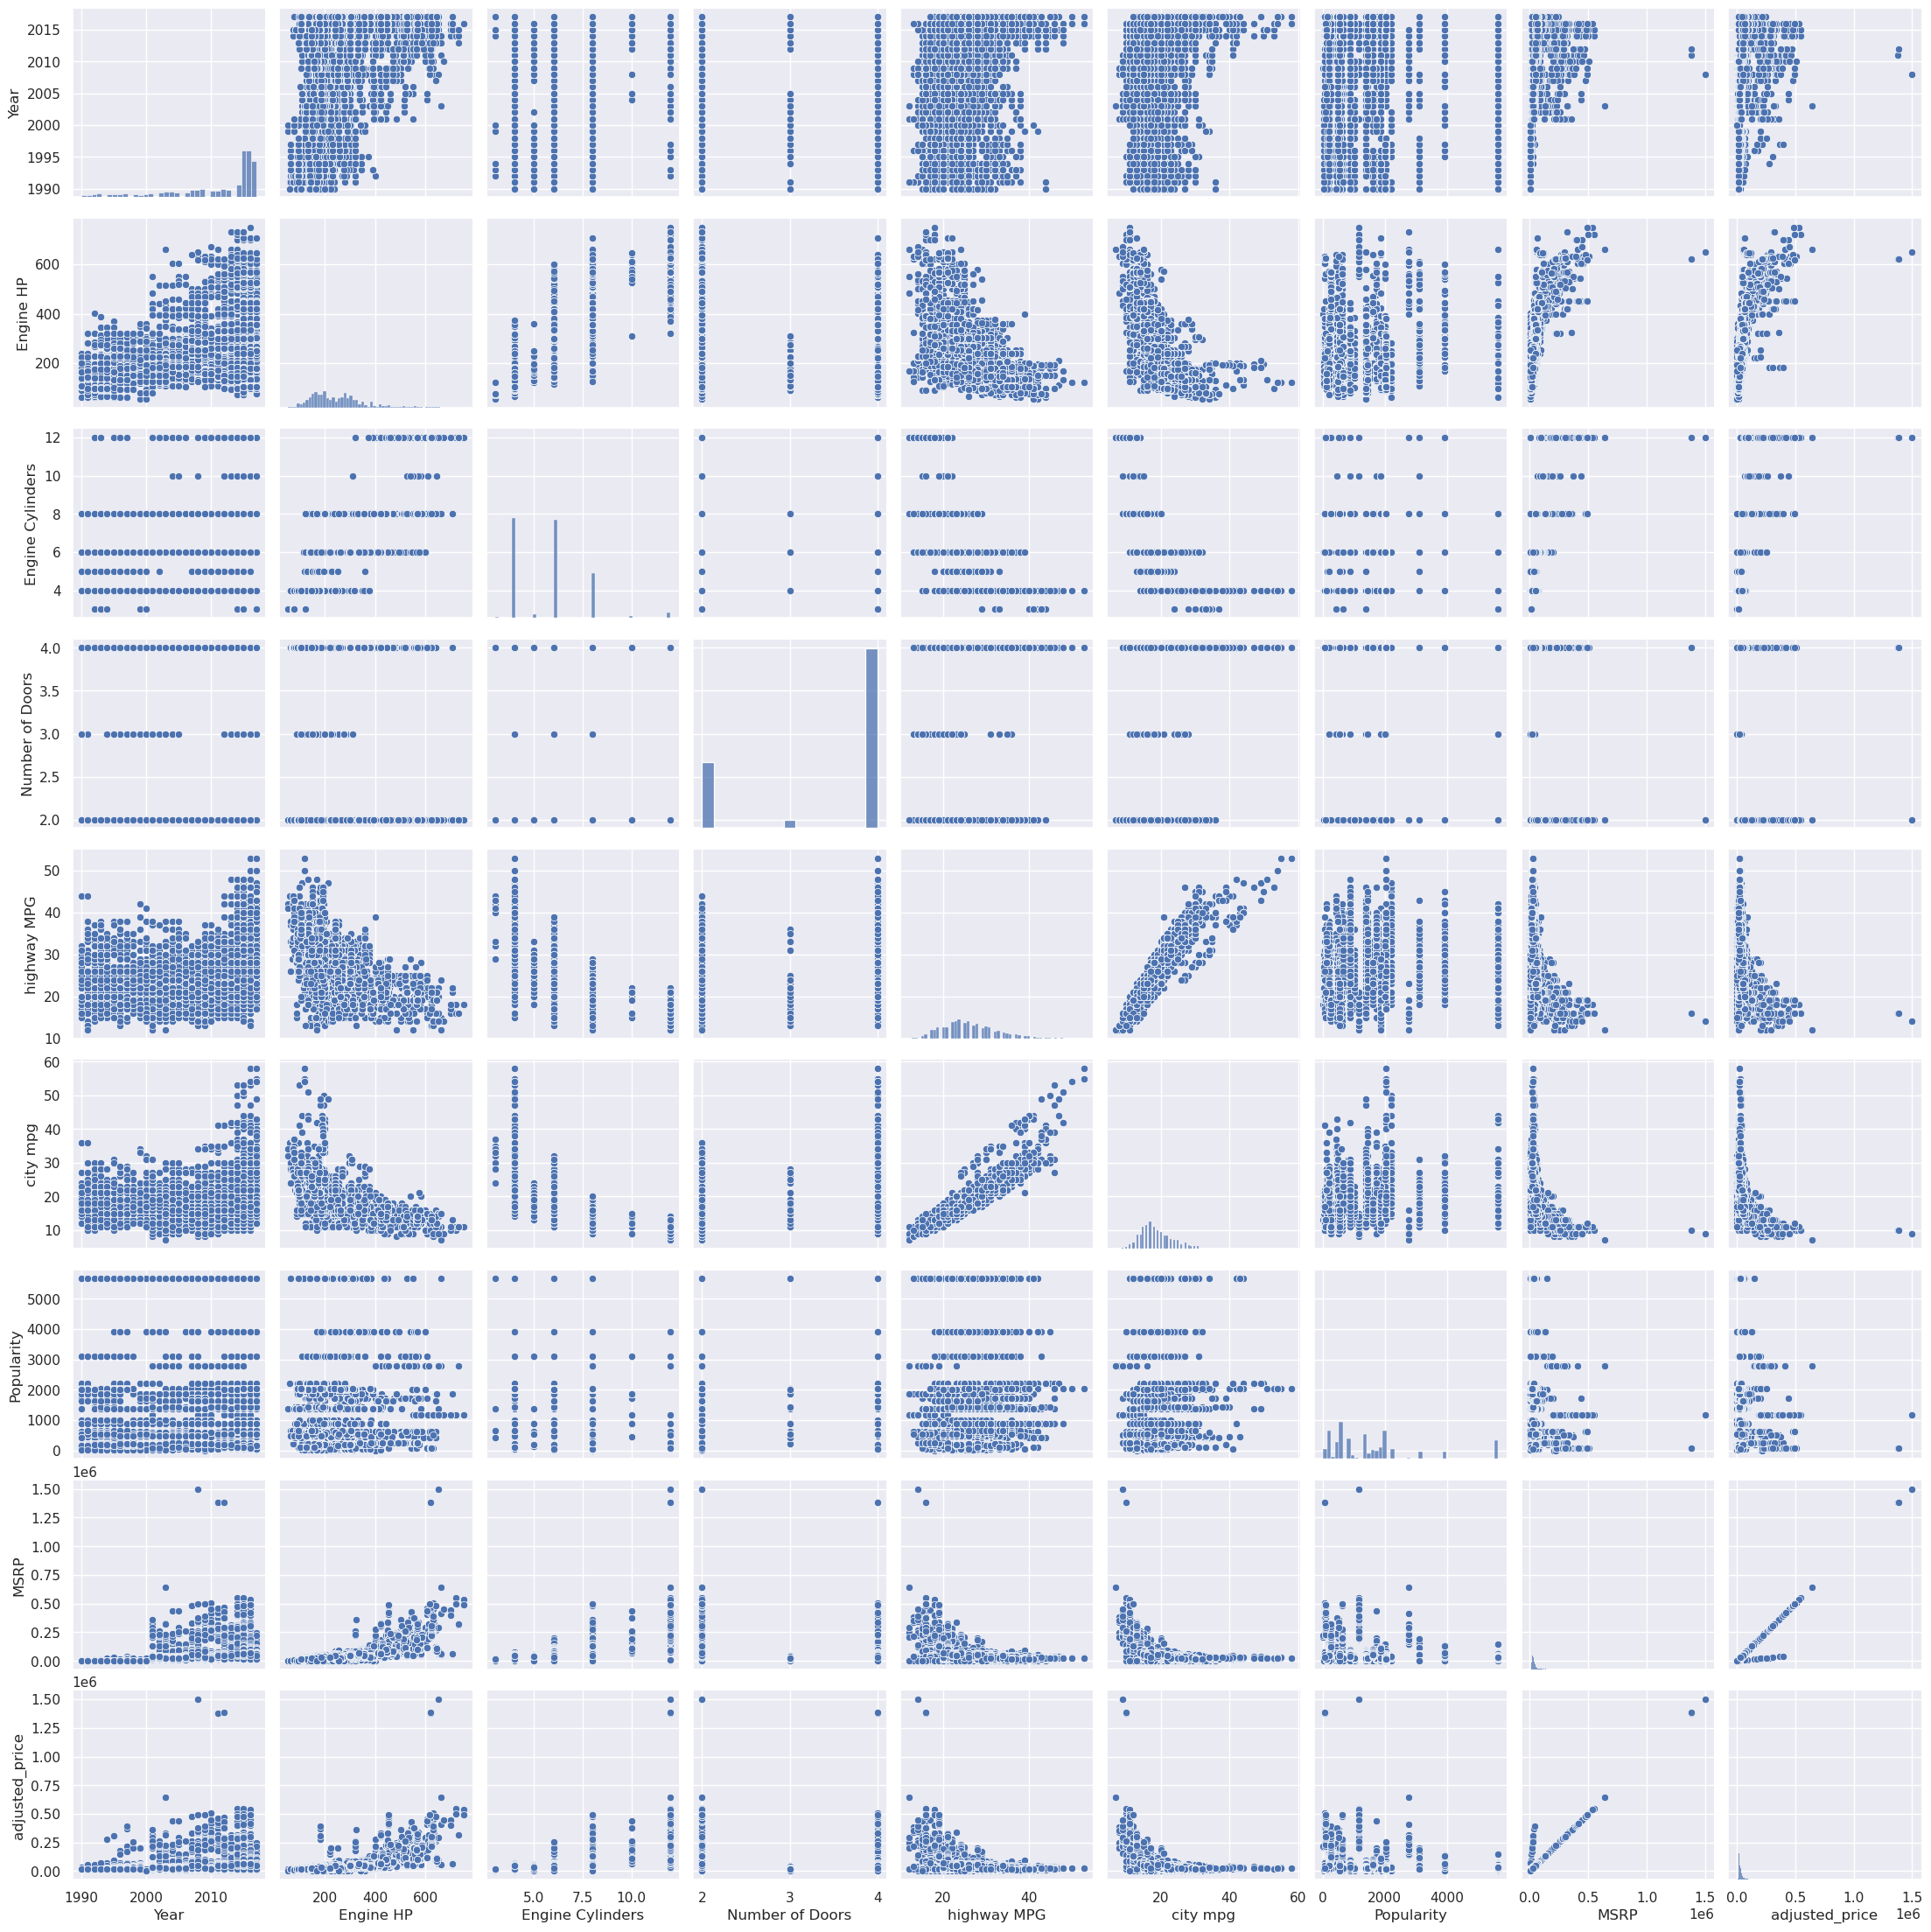

In [20]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)

In [76]:
corr = df.corr()
corr

/tmp/ipykernel_34559/2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,adjusted_price
Year,1.000000,0.340881,-0.024036,0.245341,0.303476,0.245753,0.086362,0.238834,0.138827
Engine HP,0.340881,1.000000,0.788060,-0.125942,-0.493548,-0.542841,0.042862,0.689708,0.668951
Engine Cylinders,-0.024036,0.788060,1.000000,-0.144488,-0.688365,-0.686333,0.044929,0.578498,0.591409
Number of Doors,0.245341,-0.125942,-0.144488,1.000000,0.126863,0.148305,-0.059783,-0.150162,-0.191046
highway MPG,0.303476,-0.493548,-0.688365,0.126863,1.000000,0.918881,-0.040457,-0.262243,-0.295226
city mpg,0.245753,-0.542841,-0.686333,0.148305,0.918881,1.000000,-0.017655,-0.290227,-0.316992
Popularity,0.086362,0.042862,0.044929,-0.059783,-0.040457,-0.017655,1.000000,-0.050352,-0.049815
MSRP,0.238834,0.689708,0.578498,-0.150162,-0.262243,-0.290227,-0.050352,1.000000,0.982441
adjusted_price,0.138827,0.668951,0.591409,-0.191046,-0.295226,-0.316992,-0.049815,0.982441,1.000000


In [72]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
max_corr = corr.values[corr.abs() < 1].max().max()
max_corr_indices = (corr.abs() == max_corr).stack().idxmax()
print(max_corr_indices,':', max_corr)

print("Variables with the strongest linear relationship:")
print("1. Engine HP and Engine Clyinders")
print("2. Highway MPG and City MPG")
print("3. Engine HP and MSRP")
print("4. Engine HP and adjusted_price")

('MSRP', 'adjusted_price') : 0.9824407011343157
Variables with the strongest linear relationship:
1. Engine HP and Engine Clyinders
2. Highway MPG and City MPG
3. Engine HP and MSRP
4. Engine HP and adjusted_price


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

<Axes: >

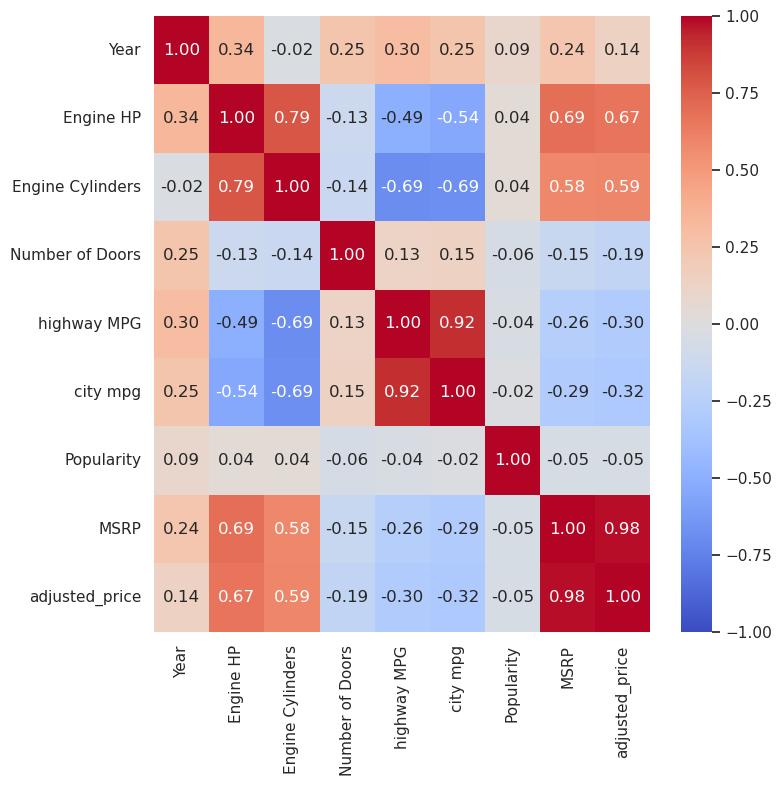

In [73]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

In [75]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.
max_corr = corr['Engine HP'][corr['Engine HP'].abs() < 1].max()
strongest_relationship_feature = corr[corr['Engine HP'] == max_corr].index[0]
print(strongest_relationship_feature,':', max_corr)

print('Engine HP has the strongest relationship with Engine Cylinders. The reason is due to the engine\'s performance and size.')

Engine Cylinders : 0.7880599393343993
Engine HP has the strongest relationship with Engine Cylinders. The reason is due to the engine's performance and size.


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 


